<a href="https://colab.research.google.com/github/prathammehta16/ML_University_Course/blob/main/20IT068_Lab4_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PRACTICAL 4##

##20IT068##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

Create a synthetic Dataset using make_classification of sklearn:

In [2]:
X, y = make_classification(n_samples=40, n_features=3, n_redundant=0, n_informative=1,n_clusters_per_class=1, random_state=2)

In [3]:
X[0]

array([-1.97012939, -0.63467931,  0.50839624])

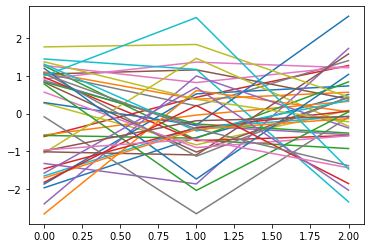

In [4]:
for i in range(len(X)):
  plt.plot(X[i])

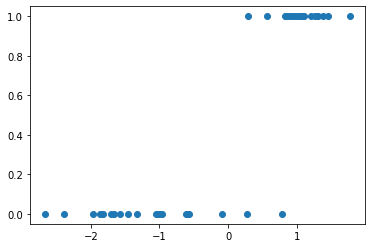

In [5]:
X, y = make_classification(n_samples=40, n_features=1, n_redundant=0, n_informative=1,n_clusters_per_class=1, random_state=2)
plt.scatter(X,y)
plt.show()

create dataset using hypothesis of populations from scratch.

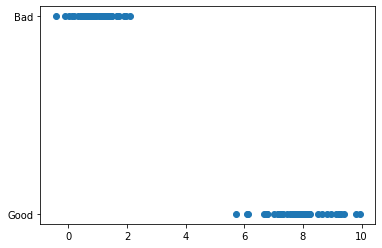

In [9]:
S = np.random.normal(8, 1, 50)
M = np.random.normal(1, 0.5, 50)

df = pd.DataFrame(data = S, columns = ["Number of Sleep hours"])
df['Health'] = "Good"

df_t = pd.DataFrame(data = M, columns = ["Number of Sleep hours"])
df_t['Health'] = "Bad"
df= df.append(df_t)

X = df['Number of Sleep hours']
y = df.Health
plt.scatter(X,y)
plt.show()

**Why do you want to apply classification to the selected dataset? Discuss the full story behind the dataset**

 Here I used the breast cancer dataset from scikit-learn. This dataset contains tumor observations and corresponding labels for whether the tumor was malignant or benign. I chose this dataset to check if the tumour is cancerous or spreadable or non cancerous. Through this we can identify cancer at an early stage which can save someone's life.

In [10]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer(as_frame=True)

**How many total observations are in the data?**

There are total of 569 rows and 30 columns present in the data.

In [51]:
dataset['data'].shape

(569, 30)

**How many independent variables?**

There are 30 independent variables in the data.

In [11]:
dataset['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Which is the dependent variable?**

Here the target column which consists of whether the tumor was malignant or benign is the dependent variable.

In [52]:
dataset['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [13]:
dataset['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [16]:
X = dataset['data']
y = dataset['target']

df = pd.DataFrame(X, columns=dataset['feature_names'])
df['target'] = y

**Which are the most valuable variables in classification? Prove using correlation.**

Below we can see important variables used for classification.

In [19]:
corr = df.corr()
corr_with_target = abs(corr['target'])
print(corr_with_target)

target                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
Name: target, dtype: float64


##Implement Logistic regression from scratch(All steps).##

In [38]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
X = ss_train.fit_transform(X)

In [39]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    h= 1 / (1 + np.exp(-z))
    return h

In [40]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

In [41]:
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [42]:
intercept = np.ones((X.shape[0], 1))
len(intercept)

569

In [43]:
import time
start_time = time.time()

num_iter = 1000

intercept = np.ones((X.shape[0], 1)) 
X_or = X
X = np.concatenate((intercept, X), axis=1)

theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):0.27976202964782715 seconds
Learning rate: 0.1
Iteration: 1000


In [44]:
result = sigmoid(X, theta)
f = pd.DataFrame(np.around(result, decimals=6))
f['class'] = y
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['class']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


98.76977152899823

##Implement Logistic regression using sklearn API.##

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
predictions = model.predict(X_test)
print(predictions)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


##Quantify the goodness of your model and discuss steps taken for improvement (Accuracy, Confusion matrices, F-measure).##

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  86
False Positive(FP) =  2
True Negative(TN)  =  51
False Negative(FN) =  4


In [50]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.958


In [53]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
Fscore = 2*(precision*recall) / (precision + recall)
print(Fscore)

0.9662921348314608
